In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce
from copy import copy
from difflib import SequenceMatcher

def get_rev_comp(seq):
    return reduce(lambda A,B : A + B, list(map(
                    lambda x : {
                                'a':'T',
                                't':'A',
                                'g':'C',
                                'c':'G',
                                'A':'T',
                                'T':'A',
                                'G':'C',
                                'C':'G'}[x], seq[::-1])), '')


def get_data():

    with open('./rothemund-rectangle/scaffold_m13mp18') as f: scaf = f.read().replace(' ','').replace('\n','')
    all_staples = pd.read_csv('./rothemund-rectangle/base_sequences.csv')
    stap = list(all_staples['Sequence'])

    rev_comp_scaf = get_rev_comp(scaf)

    sc = rev_comp_scaf
    
    return sc,stap

In [512]:
def get_match(sc,st):
    seqMatch = SequenceMatcher(None,sc,st,autojunk=False)   
    match = seqMatch.find_longest_match(0, len(sc), 0, len(st))
    return match


def replace_stap_by_dots(st,match):
    st2 = ""
    
    WIGGLE = 0
    
    for i in range(len(st)):
        if i in list(range(match.b+WIGGLE, match.b+match.size-WIGGLE)):
            st2 += "."
        else:
            st2 += st[i]

    return st2



def replace_scaf_by_dots(sc,match):
    sc2 = ""
    
    WIGGLE = 0
    #obviously it would make more sense to use a mutable string.
    
    for i in range(len(sc)):
        if i in list(range(match.a+WIGGLE, match.a+match.size-WIGGLE)):
            sc2 += "."
        else:
            sc2 += sc[i]

    return sc2

all_matches = []

sc,stap = get_data()

for st in stap:
    
    local_matches = []
    
    matches = []

    sc2 = copy(sc)

    #threshold?
    
    for i in range(50):
        
        match = get_match(sc2,st)
        

        sc2 = replace_scaf_by_dots(sc2,match)

        #NO! instead  we should replace the scaffold by dots.
        #st2 = replace_string_by_dots(st2,match)

        #maybe the above isn't such a great idea?
        local_matches.append(match)

    all_matches.append(local_matches)

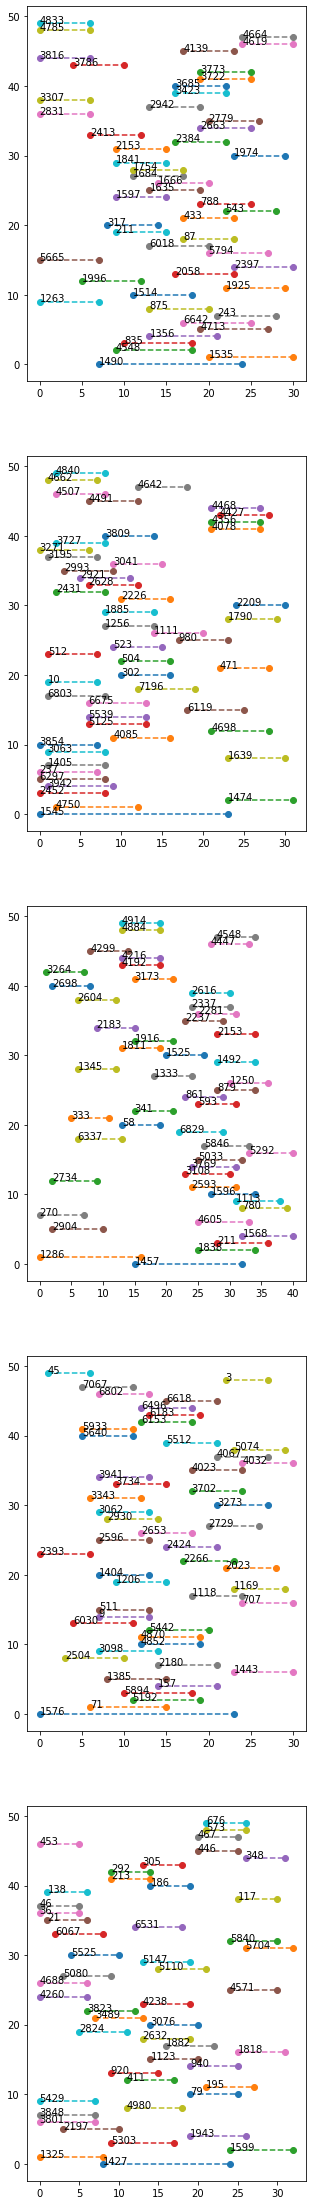

In [516]:
f,ax = plt.subplots(5,1,figsize = (5,40))

for q,a in zip(all_matches,ax):
    for i,j in enumerate(q):
        a.text(j.b,i,j.a)
        a.plot([j.b,j.size+j.b],[i,i],'--o')

In [521]:
for i in all_matches:
    print ('#')
    for j in i:
        print (j.size)

#
17
10
9
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
23
10
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
17
16
9
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
23
9
8
8
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
#
16
8
8
8
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
#
25
9
9
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
19
15
9
9
9
9
9
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
16
9
8
8
8
8
8
8
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
#
23
9
9
9
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
23
8
8
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


16
8
8
8
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
#
20
10
9
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
15
9
9
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
17
9
8
8
8
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
#
16
9
9
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
16
9
9
9
9
9
9
8
8
8
8
8
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
#
16
10
10
9
8
8
8
8
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
17
9
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
17
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
#
16
13
11
11
11
11
11
11
8
8
8
8
8
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6


In [ ]:
#we could add staples in order?

In [ ]:
#can we describe this as an SAT problem?

In [485]:
staple_locs = []
for i in all_matches:
    local_staple = []
    for j in i:
        local_staple += list(range(j.a,j.a+j.size))
    staple_locs.append(np.array(local_staple))

In [486]:
def pos_to_theta(loc,max_loc):
    return 2*np.pi*loc/max_loc

In [487]:
def theta_to_pos(loc,max_loc):
    theta = pos_to_theta(loc,max_loc)
    x = np.cos(theta)
    y = np.sin(theta)
    return (x,y)

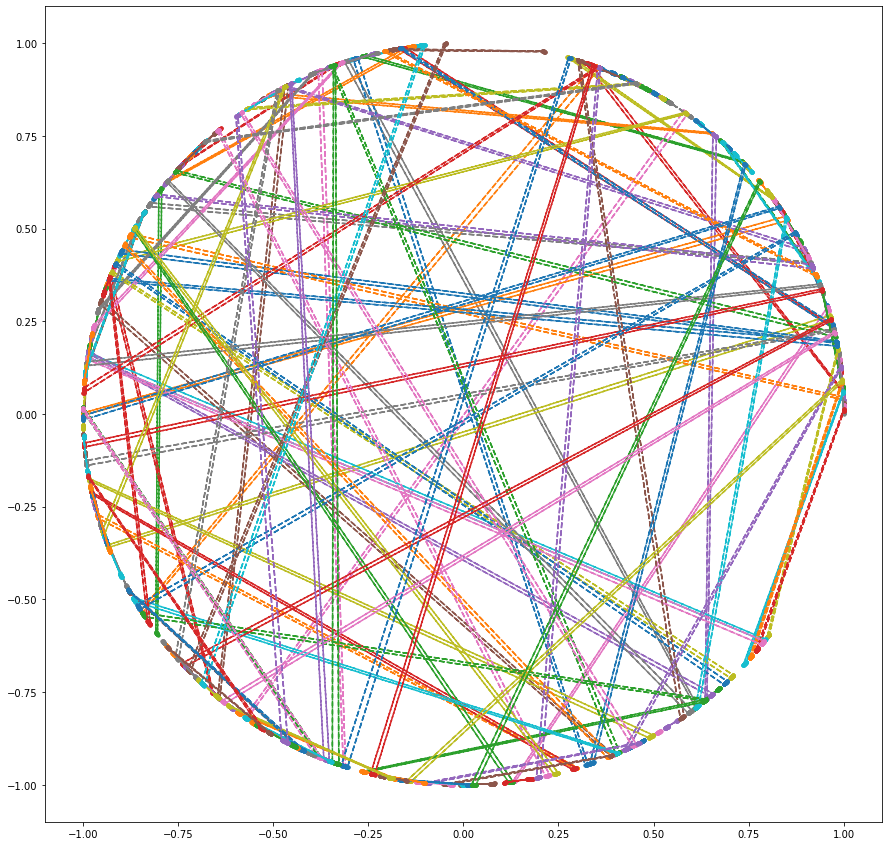

In [488]:
f,ax = plt.subplots(1,1,figsize = (15,15))

#map to circlegraph
max_loc = len(scaf)

for i in staple_locs:
    x,y = theta_to_pos(i, max_loc)
    plt.plot(x,y,'--.')
    #plt.plot([i.a,i.a+i.size],[1,1],'--o')

#worry about collisions, and about 